In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Probability of heads
p_heads = 0.4
GAMMA = 1

# Rewards: only state 100 gives a reward of 1
rewards = np.zeros(101)
rewards[100] = 1

In [3]:
class PolicyIteration:
    def __init__(self):
        self.val_state = np.zeros(101)
        self.policy = np.zeros(100, dtype=int)

    def bellman(self, state, action, val_state):
        win = state + action
        lose = state - action
        return p_heads * (rewards[win] + GAMMA * val_state[win]) + (1 - p_heads) * (rewards[lose] + GAMMA * val_state[lose])

    def policy_evaluation(self, epsilon=1e-12):
        while True:
            delta = 0
            for state in range(1, 100):
                v = self.val_state[state]
                self.val_state[state] = self.bellman(state, self.policy[state], self.val_state)
                delta = max(delta, abs(self.val_state[state] - v))
            if delta < epsilon:
                break
        return self.policy_improvement()

    def policy_improvement(self):
        policy_stable = True
        for state in range(1, 100):
            old_action = self.policy[state]
            max_action = min(state, 100 - state)
            val_action = np.zeros(max_action + 1)

            for action in range(1, max_action + 1):
                val_action[action] = self.bellman(state, action, self.val_state)

            best_actions = np.argwhere(val_action == np.max(val_action)).squeeze()
            self.policy[state] = np.random.choice(best_actions) if best_actions.size > 0 else 0

            if old_action != self.policy[state]:
                policy_stable = False

        if not policy_stable:
            return self.policy_evaluation()

        return self.val_state, self.policy

In [4]:
class ValueIteration:
    def __init__(self):
        self.val_state = np.zeros(101, dtype=np.float128)
        self.policy = np.zeros(100, dtype=int)

    def bellman(self, state, action, val_state):
        win = state + action
        lose = state - action
        return p_heads * (rewards[win] + GAMMA * val_state[win]) + (1 - p_heads) * (rewards[lose] + GAMMA * val_state[lose])

    def value_iteration(self, epsilon=1e-12):
        while True:
            delta = 0
            for state in range(1, 100):
                v = self.val_state[state]
                max_action = min(state, 100 - state)
                val_action = np.zeros(max_action + 1, dtype=np.float128)

                for action in range(1, max_action + 1):
                    val_action[action] = self.bellman(state, action, self.val_state)

                self.val_state[state] = np.max(val_action)
                delta = max(delta, abs(self.val_state[state] - v))

            if delta < epsilon:
                break
        return self.policy_extraction()

    def policy_extraction(self):
        for state in range(1, 100):
            max_action = min(state, 100 - state)
            val_action = np.zeros(max_action + 1)

            for action in range(1, max_action + 1):
                val_action[action] = self.bellman(state, action, self.val_state)

            best_actions = np.argwhere(val_action == np.max(val_action)).squeeze()
            self.policy[state] = np.random.choice(best_actions) if best_actions.size > 0 else 0

        return self.val_state, self.policy

In [5]:
# Running Value Iteration
vi = ValueIteration()
v, p = vi.value_iteration()

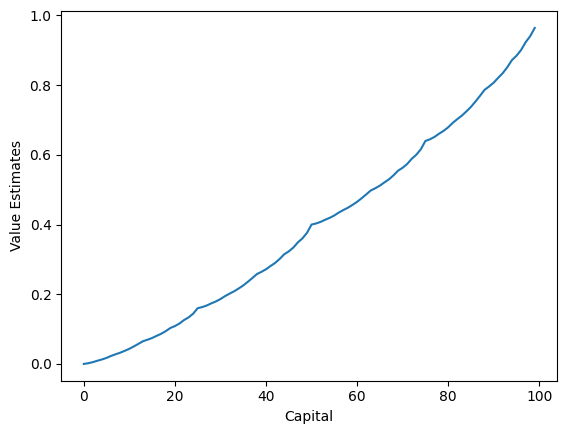

In [6]:
# Plot Value Function
plt.plot(range(100), v[:100])
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.show()

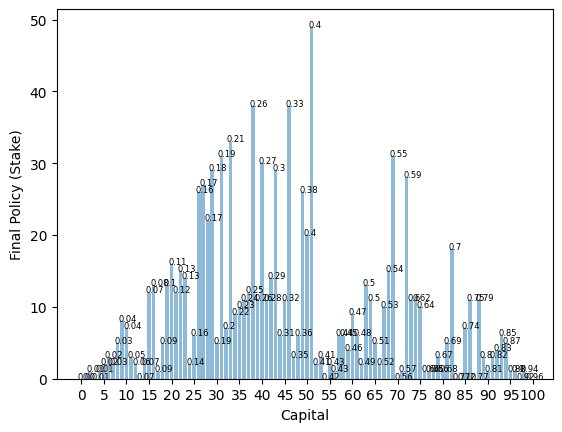

In [7]:
# Plot Optimal Policy
plt.bar(range(100), p, align='center', alpha=0.5)
for i in range(100):
    plt.text(i - 0.75, p[i] + 0.01, str(round(v[i], 2)), fontsize=6)

plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final Policy (Stake)')
plt.show()